# データの表現と特徴量エンジニアリング

In [55]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn
from IPython.display import display
import warnings
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.simplefilter('ignore')

## カテゴリ変数

ロジスティック回帰クラス分類器を用いて、学習しようとしたとき、データが離散値特徴量(カテゴリ特徴量)であった場合、計算することができない。そのため、データを別の方法で表現しなければならない。

### one-hot-encoding(ワンホットエンコーディング)

カテゴリ変数を表現する方法として圧倒的によく用いられる方法。ダミー変数とも呼ばれる。  

In [56]:
import os#osに依存している様々な機能を利用するためのモジュール

#このファイルにはコラム名を含んだヘッダがないのでheader=Noneを指定し、コラム名を"names"で明示的に指定
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(adult_path, header=None, index_col=False,
                  names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation"
                        , "relationship", "race", "gender", "capital-grain", "capital-loss", "hours-per-week", "native-contry"
                        , "income"])

display(data.head())
#いくつかのカラムだけ選択
data = data[["age", "workclass", "education", "gender", "hours-per-week", "occupation", "income"]]
#IPython.displayを使うと、jupyternotebookadeきれいな出力が得られる
display(data.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-grain,capital-loss,hours-per-week,native-contry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


カテゴリ変数の場合、同じ意味の別の単語（manとmale等）や大文字小文字などを統一するために前処理が必要である。

In [57]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


genderの欄にはmaleとfemaleしか含まれていないことがわかる  
すでに整理されているのでone-hot-encodingできる。  
pandasでは、get-dummies関数を使って簡単にデータをone-hot-encodingすることができる

In [58]:
print("Original feature:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Feature after get_dummies:\n", list(data_dummies.columns))

Original feature:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Feature after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-ins

連続値特徴量であるage,hours-per-weekは変更されていないことがわかる

In [59]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [60]:
features = data_dummies.loc[:, "age":"occupation_ Transport-moving"]

#NumPy配列を取り出す
X = features.values
y = data_dummies["income_ >50K"].values

print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


これでデータがscikit-learnが扱える形になった。

In [61]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


この例では、テストデータと訓練データの双方が入ったDataFrameに対して、get_dummiesを呼んでいる。  
これは、カテゴリ値が訓練セットでもテストセットでも同じように表現されることが重要であるからだ。

In [62]:
#整数特徴量とカテゴリ文字列特徴量を持つDataFrameを作る

demo_df = pd.DataFrame({"Integer Feature":[0, 1, 2, 1], "Categorical Feature":["socks", "fox", "socks", "box"]})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [63]:
#get_dummiesを実行しても、整数特徴量は変化しない
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [64]:
#Integer Featureに対しても、ダミー変数を作りたければ、columnsパラメータで明示的に指定する。
demo_df["Integer Feature"] = demo_df["Integer Feature"].astype(str)
pd.get_dummies(demo_df, columns={"Integer Feature", "Categorical Feature"})

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## ビニング、離散化、線形モデル、決定木

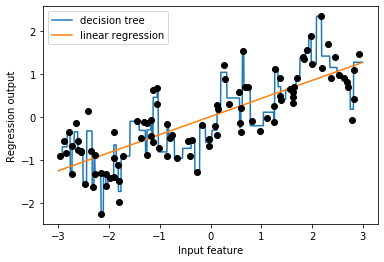

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, "o", c="k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

線形モデルを連続データに対してより強力にする方法の1つとして、特徴量のビニング(binning)もしくは離散化(discretization)がある。  
特徴量の入力レンジ(この場合-3から3)を固定数のビン。

In [66]:
bins = np.linspace(-3, 3, 11)#10個のビンに分割する（11個のエントリが作られる）
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [67]:
#個々のデータポイントがどの便に入るかを記録する
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBins menbership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bins menbership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


上では、waveデータセットの単一の連続値入力特徴量の、どのビンにデータポイントが入っているかを表現したカテゴリ特徴量への置き換えを行った。  
この離散値特徴量をone-hot-encodingに変換する必要がある。get_dummiesは整数値で表現されたカテゴリ変数しか扱うことができない。

In [68]:
from sklearn.preprocessing import OneHotEncoder

#OneHotEncoderで変換
encoder = OneHotEncoder(sparse=False)

#encoder.fitでwhich_binに表れる整数値のバリエーションを確認
encoder.fit(which_bin)

#transformでone-hot-encodingを行う
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [69]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


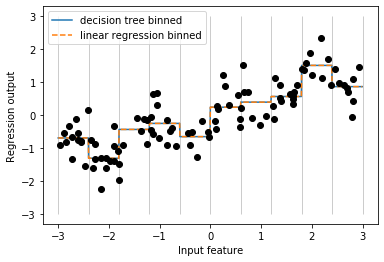

In [70]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="decision tree binned")

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), linestyle="--", label="linear regression binned")

plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)#vertical line
plt.plot(X[:, 0], y, "o", c="k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

線形回帰と決定木が完全に同じ予測をしている。双方とも、個々のビンに対して一定値を予測する。ビンごとに特徴量が一定になるので、どのようなモデルを持ってきても、ビンの中では同じ予測をすることになるのだ。  
線形モデルに関しては、ビニング後の方が予測がより柔軟になっていることがわかる。一方決定木に関しては、柔軟性が低下している。決定木はデータを任意の場所で分割して学習できるため、一般に決定木に関してはビニングを行うメリットがない。

## 交互作用と多項式

特徴量表現をより豊かにするもう一つの方法として、特に線形モデルに対して有効なのが、交互作用特徴量(interaction feature)と多項式特徴量(polynomial feature)を加える方法である。

In [71]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


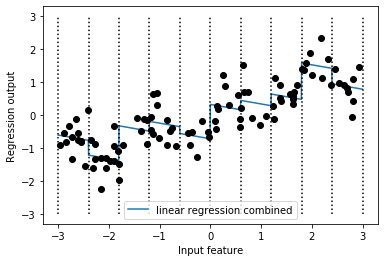

In [72]:
line_combined = np.hstack([line, line_binned])

reg = LinearRegression().fit(X_combined, y)
plt.plot(line, reg.predict(line_combined), label="linear regression combined")
for bin in bins:
    plt.plot([bin, bin], [-3,3], ":", c="k")
plt.plot(X[:, 0], y, "o", c="k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

ビニングされた特徴量と大域的な単一の傾きに対する線形回帰  
モデルは個々のビンに対してオフセットと傾きを学習する  
それぞれのビンごとに傾きを設定するには、データポイントがどのビンに入っているかを示す特徴量とx軸のどこにあるかを示す特徴量の交互作用もしくは積を特徴量として加えればいい。

In [73]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)
#元の特徴量とビン番号の積で合計20個

(100, 20)


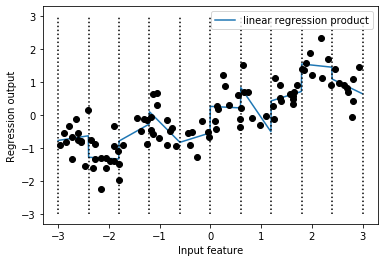

In [74]:
line_product = np.hstack([line_binned, line * line_binned])

reg = LinearRegression().fit(X_product, y)
plt.plot(line, reg.predict(line_product), label="linear regression product")
for bin in bins:
    plt.plot([bin, bin], [-3,3], ":", c="k")
plt.plot(X[:, 0], y, "o", c="k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

ビンごとに傾きを持つ線形回帰  
個々のビンがそれぞれオフセットと傾きを持つようになっている。(オフセットとは位置を基準点からの距離で表した値)  
ビニングは連続値を拡張する方法の1つであり、  
もう一つは、元の特徴量の多項式を使うことである。ある特徴量に対してx ** 2, x ** 3, x ** 4 を考える。  

In [75]:
from sklearn.preprocessing import PolynomialFeatures

#x ** 10までの多項式を加える。
#デフォルトの"include_bias=True"だと、常に1となる特徴量を加える。
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [76]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [77]:
print("Enteries of X:\n{}".format(X[:5]))
print("Enteries of X_poly:\n{}".format(X_poly[:5]))

Enteries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Enteries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [78]:
print("Polynomial feature name:\n{}".format(poly.get_feature_names()))

Polynomial feature name:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


多項式特徴量を線形回帰モデルと組み合わせると、古典的な多項式回帰モデルになる。

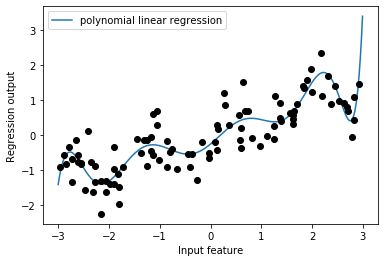

In [79]:
line_poly = poly.transform(line)

reg = LinearRegression().fit(X_poly, y)
plt.plot(line, reg.predict(line_poly), label="polynomial linear regression")
plt.plot(X[:, 0], y, "o", c="k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

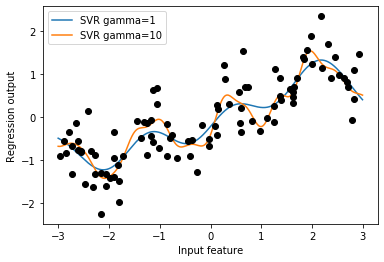

In [80]:
#比較としてカーネル法を用いたSVM
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label="SVR gamma={}".format(gamma))
plt.plot(X[:, 0], y, "o", c="k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [81]:
#交互作用特徴量と多項式特徴量boston-housing-datasetに適用してみる

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

#データには13しか特徴量がなかったが、105の交互作用特徴量まで拡張した。

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [83]:
#get_feature_nameメソッドで入力特徴量と出力特徴量の正確な位置関係を調べる

print("Polynomial feature names:{}".format(poly.get_feature_names()))

Polynomial feature names:['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


最初の特徴量は定数特徴量で、次の13の特徴量はもとの特徴量である(X0からX12)  
その次は最初の特徴量の2乗(X0^2)で、その後には、最初の特徴量と他の特徴量の組み合わせが続く。

In [84]:
#Ridgeを使って交互作用特徴量を入れた場合と入れない場合と比較する。

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly, y_test)))


Score without interactions: 0.621
Score with interactions: 0.753


交互作用特徴量と多項式特徴量はRidgeの性能を明らかに押し上げている。  
続いてrandom_forestを見ていく

In [85]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.788
Score with interactions: 0.769


追加の特徴量がなくてもランダムフォレストの性能はRidgeを上回る  
交互作用特徴量と多項式特徴量を入れると、わずかに性能が下がっている

## 単変量非線形変換

特徴量を2乗3乗したものが線形回帰モデルで有用であることを見た。  
他にも特定の特徴量に有用であることがわかっている変換がある。  
例えば、log, exp, sinなどの数学関数である。  
  
log, expはデータの相対的なスケールを修正してくれるので線形モデルやニューラルネットワークモデルどモデリングしやすくなる。  
sin, cosは周期的なパターンを持つ関数を扱うときに有用である。

In [86]:
#カウントデータ（負であることはない）
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [87]:
print("Number of feature appearances:\n {}".format(np.bincount(X[:, 0])))

Number of feature appearances:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'value')

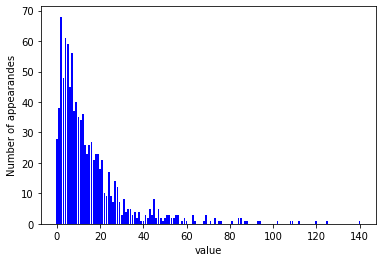

In [88]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color="b")
plt.ylabel("Number of appearandes")
plt.xlabel("value")

この種の値の分布(小さい値が多くまれにとても大きな値がある)は実データには非常によく出現する。  
しかし、このようなデータは多くの線形モデルではうまく扱えない  
試しにリッジ回帰で学習させてみる

In [89]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


R^2scoreが比較的小さいことからも分かるようにRidgeではX, yの関係をうまく捉えることができない。  
しかし、ここで対数変換を行うと話が変わってくる。

In [90]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

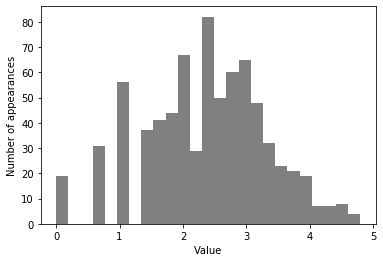

In [91]:
plt.hist(X_train_log[:, 0], bins=25, color="gray")
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [92]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


## 自動特徴量選択

単変量統計、モデルベース選択、反復選択が最も有用な特徴量を見つける基本的な戦略である。

### 単変量統計

単変量統計では、個々の特徴量とターゲットとの間に統計的に顕著な関係があるかどうかを計算する。そして、最も高い確信度で関連している特徴量が選択される。  
クラス分類の場合は、分散分析（ANOVA）として知られる手法である。これは個々の特徴量を個別に考慮する。したがって、他の特徴量と組み合わさって意味を持つような特徴量は捨てられてしまう。  
scikit-learnではf_classif(クラス分類)、f_regression(回帰)を用いる。

In [93]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile#残す特徴量の割合を決める

cancer = load_breast_cancer()

#シードうぃ指定して乱数を決定
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
#noise特徴量をデータに加える
#最初の30特徴量はデータセットから来たもの。続く50特徴量はnoise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

#f_classif(default)とSelectPercentileを使って50%の特徴量を選択
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape : {}".format(X_train.shape))
print("X_train_selected.shape : {}".format(X_train_selected.shape))

X_train.shape : (284, 80)
X_train_selected.shape : (284, 40)


特徴量の数が半分(50%)に減っている。

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

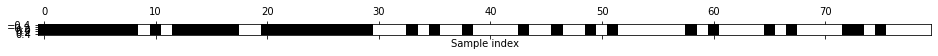

In [94]:
mask = select.get_support()
print(mask)

#maskを可視化する　-- black==true, white==false
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [95]:
from sklearn.linear_model import LogisticRegression

#test-dataの変換
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.919
Score with only selected features: 0.909


### モデルベース特徴量選択

教師あり学習を用いて個々の特徴量の重要性を判断し、重要なものだけを残す手法

In [96]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

#SelectFromModelクラスは教師あり学習モデルで得られた特徴量の重要性が指定したthresholdよりも大きい特徴量だけを選択する。

In [97]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False  True False
 False False False False  True False False  True False  True  True False
 False False  True False False  True  True False False False False False
 False  True False False False False False False False  True False False
 False  True False False False False False False]


Text(0.5, 0, 'Sample index')

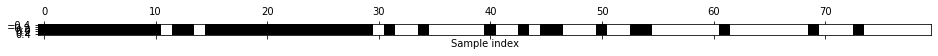

In [98]:
mask = select.get_support()
print(mask)

#maskを可視化する　-- black==true, white==false
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [99]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.930


### 反復特徴量選択

（単変量テストではモデルを全く使わず、モデルベース選択ではモデルを1つだけ使って、特徴量を選択した。）  
反復特徴量選択では、異なる特徴量を用いた一連のモデルを作る。  

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False False False
 False False False False False False False False False False False  True
  True False  True False False  True  True False False False  True False
 False False False False False  True False  True False False False False
 False  True False False False  True False False]


Text(0.5, 0, 'Sample index')

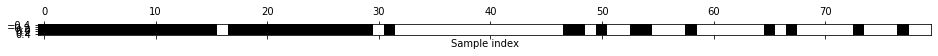

In [100]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)

mask = select.get_support()
print(mask)

#maskを可視化する　-- black==true, white==false
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [101]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.930


In [102]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


## 専門家知識の利用

In [104]:
citibike = mglearn.datasets.load_citibike()

print("Citi Bike data:\n{}".format(citibike.head()))
#家の前にあるレンタル自転車の件数（レンタルされた数）

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

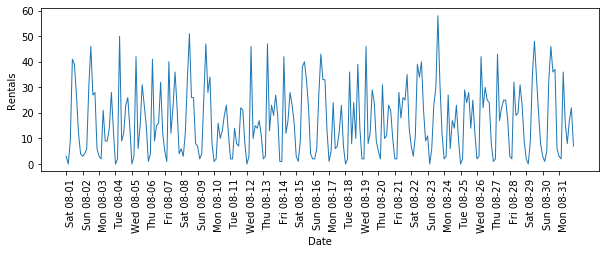

In [107]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq="D")
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

24時間単位の昼間と夜間の区別が明確に見て取れる。このような時系列に対する予測タスクでは、過去から学習と未来を予測するアプローチをとる。  
計算機で日時を格納するにはPOSIX時刻を用いることが多い

In [137]:
#target値（レンタル数）を抽出
y = citibike.values

#10**9で割ってPOSIX時刻に変換
X = citibike.index.astype("int64").values.reshape(-1, 1)


In [141]:
#最初の184データポイントを訓練セットとする。8(times/day)*23day
n_train = 184

#与えられた特徴量セットで、回帰器を評価し、プロットする関数
def eval_on_features(features, target, regressor):
    #与えられた特徴量を訓練セットとテストセットに分割
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    
    y_pred = regressor.predict(X_test)#predicted target
    y_pred_train = regressor.predict(X_train)#predicted features
    
    plt.figure(figsize=(10, 3))
    
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")
    
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, "-", label="test")
    plt.plot(range(n_train), y_pred_train, "--", label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, "--", label="prediction test")
    
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")


Test-set R^2: -0.04


<Figure size 432x288 with 0 Axes>

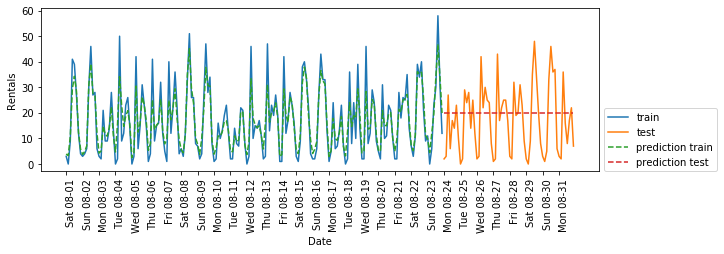

In [142]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

ランダムフォレストではいつものことであるが、訓練セットに対する予測は非常に良い。しかし、テストセットに対しては定数の線が予測されてしまっている。予測値は-0.04となっており、これは何も予測できていないことを意味する。  
testsetのPOSIX時刻特徴量の値は訓練セットの特徴量値のレンジを外れているからである。つまり、決定木は外挿(extrapolate)することができないためである。  
こういう時に「専門家の知識」を使うことができる。この履歴を見ると一日の中の時間帯と曜日が重要であることがわかる。したがってこれらの特徴量を加えてみる。

Test-set R^2: 0.60


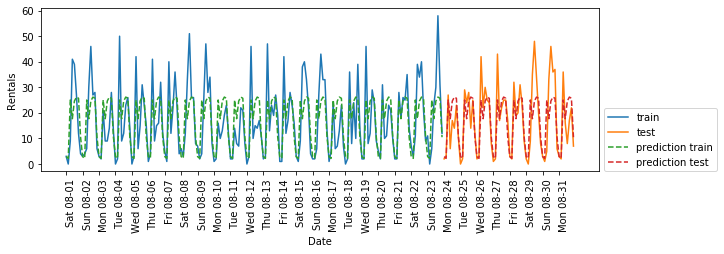

In [143]:
X_hour = citibike.index.hour.to_numpy().reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

予測値ははるかによくなったが、曜日の特徴量をまだ加えていないので、毎日同じ予測を行っているだけである。  
曜日の特徴量も加えてみる。

Test-set R^2: 0.84


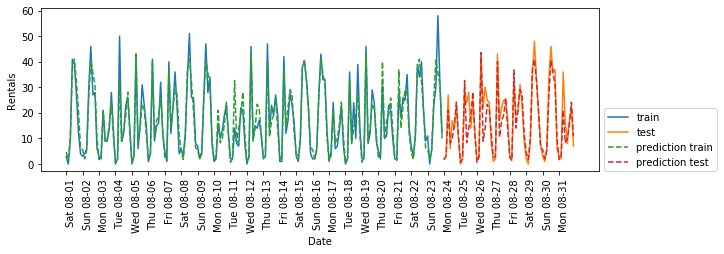

In [144]:
X_hour_week = np.hstack([citibike.index.dayofweek.to_numpy().reshape(-1, 1), citibike.index.hour.to_numpy().reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

曜日の特徴量を加えたらさらに良くなった。  
LinearRegressionで試してみる。

Test-set R^2: 0.13


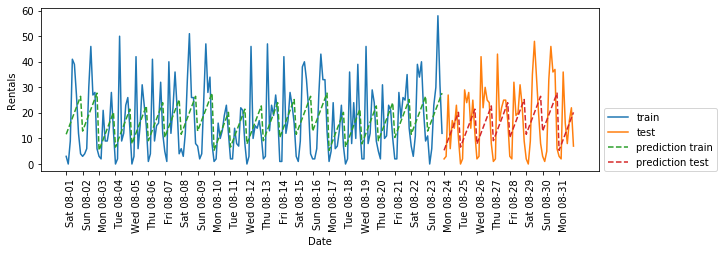

In [145]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

性能がずっと悪くなっている。また周期パターンも妙である。  
この原因は、曜日や時刻が整数でエンコードされていて連続値として解釈されているからだ。  
線形モデルは自国に対する線形関数としてしか学習ができないので、時刻が遅いほどレンタル数が大きくなると学習してしまっている。しかし、実際のパターンはより複雑であるため、整数をone-hot-encoderを用いて変換することで、カテゴリ変数として、解釈すればパターンをとらえることができる。

In [146]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

Test-set R^2: 0.62


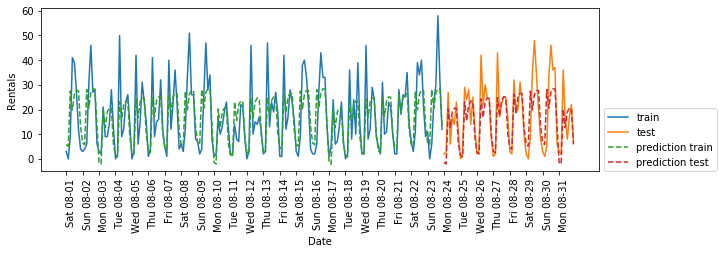

In [147]:
eval_on_features(X_hour_week_onehot, y, Ridge())

Test-set R^2: 0.61


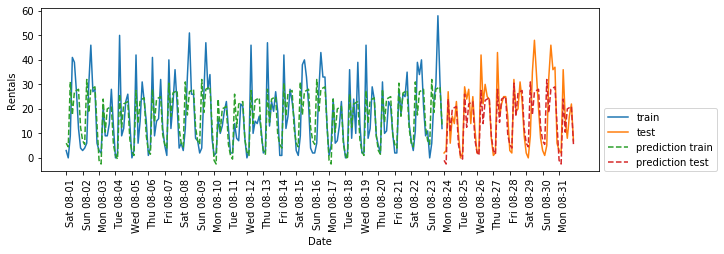

In [148]:
#補足（最初linear regressionでやったからやってみた）
eval_on_features(X_hour_week_onehot, y, LinearRegression())

ここで交互作用特徴量を用いれば曜日と時刻の組み合わせに対して係数を学習させることができる。

Test-set R^2: 0.85


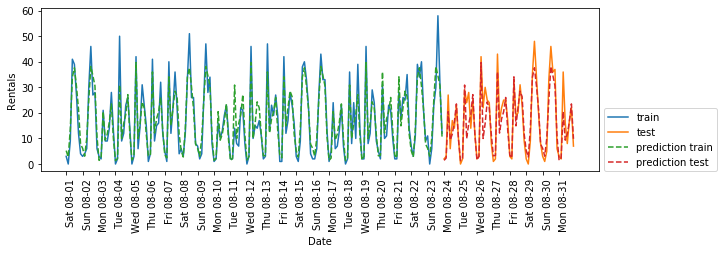

In [149]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

['Mon' 'Tue' 'Wed' 'Thu' 'Fri' 'Sat' 'Sun' '00:00' '03:00' '06:00' '09:00'
 '12:00' '15:00' '18:00' '21:00' 'Mon 00:00' 'Mon 03:00' 'Mon 06:00'
 'Mon 09:00' 'Mon 12:00' 'Mon 15:00' 'Mon 18:00' 'Mon 21:00' 'Tue 00:00'
 'Tue 03:00' 'Tue 06:00' 'Tue 09:00' 'Tue 12:00' 'Tue 15:00' 'Tue 18:00'
 'Tue 21:00' 'Wed 00:00' 'Wed 03:00' 'Wed 06:00' 'Wed 09:00' 'Wed 12:00'
 'Wed 15:00' 'Wed 18:00' 'Wed 21:00' 'Thu 00:00' 'Thu 03:00' 'Thu 06:00'
 'Thu 09:00' 'Thu 12:00' 'Thu 15:00' 'Thu 18:00' 'Thu 21:00' 'Fri 00:00'
 'Fri 03:00' 'Fri 06:00' 'Fri 09:00' 'Fri 12:00' 'Fri 15:00' 'Fri 18:00'
 'Fri 21:00' 'Sat 00:00' 'Sat 03:00' 'Sat 06:00' 'Sat 09:00' 'Sat 12:00'
 'Sat 15:00' 'Sat 18:00' 'Sat 21:00' 'Sun 00:00' 'Sun 03:00' 'Sun 06:00'
 'Sun 09:00' 'Sun 12:00' 'Sun 15:00' 'Sun 18:00' 'Sun 21:00']
[ -4.16724739  -1.59581882  -0.52439024  -0.06010453   1.22560976
   2.26367831   2.85827291 -11.69389764 -12.11122047   8.61318898
  -0.07972441   5.36909449   7.24311024   7.63681102  -4.9773622
   0.71826731

Text(0, 0.5, 'Feature magnitude')

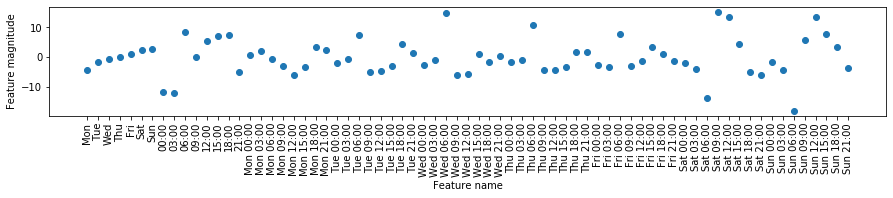

In [152]:
#時刻と曜日の特徴量に名前を付ける。
hour = ["%02d:00" % i for i in range(0, 24, 3)]#0,3,6,9,12,15,18,21
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

#PolynomialFeaturesで抽出した交互作用特徴量に対して、名前を付ける。
features_poly = poly_transformer.get_feature_names(features)
#係数が非ゼロの特徴量だけ残す
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
print(features_nonzero)
coef_nonzero = lr.coef_[lr.coef_ != 0]
print(coef_nonzero)

plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, "o")
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")

時刻と曜日の積を用いた線形回帰モデルの係数